# Sprawozdanie - MOwNiT - laboratorium 2.

#### Autor: Jakub Psarski

## 1. Metoda Gaussa-Jordana

Napisz i sprawdź funkcję rozwiązującą układ równań liniowych `n`x`n` metodą Gaussa-Jordana z częściowym poszukiwaniem elementu wiodącego. Dla dziesięciu różnych rozmiarów macierzy współczynników większych niż `500`×`500` porównaj czasy działania zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji bibliotecznych.

### Importowanie potrzebnych bibliotek

In [20]:
import time
import numpy as np

### Implementacja metody Gaussa-Jordana

In [21]:
def gauss_jordan_upper(matrix, vector):
    matrix_size = len(matrix)
    matrix_extended = np.hstack([matrix.astype(float), vector.reshape(-1, 1).astype(float)])

    for i in range(matrix_size):
        max_row = np.argmax(abs(matrix_extended[i:, i])) + i
        if i != max_row:
            matrix_extended[[i, max_row]] = matrix_extended[[max_row, i]]

        matrix_extended[i] /= matrix_extended[i, i]

        for j in range(i + 1, matrix_size):
            matrix_extended[j] -= matrix_extended[i] * matrix_extended[j, i]

    return matrix_extended[:, :-1], matrix_extended[:, -1]


### Funkcje pomocnicze

- Rozwiązanie równania w formie macierzy trójkątnej górnej przez podstawianie wstecz

In [22]:
def back_substitution(matrix_upper, vector):
    matrix_size = len(matrix_upper)
    result = np.zeros(matrix_size)

    for i in range(matrix_size - 1, -1, -1):
        result[i] = (vector[i] - np.dot(matrix_upper[i, i+1:], result[i+1:])) / matrix_upper[i, i]

    return result

- Funkcja rozwiązująca układ równań

In [23]:
def solve_system(matrix, vector):
    matrix_upper, vector_new = gauss_jordan_upper(matrix, vector)
    return back_substitution(matrix_upper, vector_new)

### Test poprawności i porównanie czasów działania

In [24]:
sizes = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 2137]

for matrix_size in sizes:
    matrix = np.random.rand(matrix_size, matrix_size)
    vector = np.random.rand(matrix_size)

    start = time.time()
    gj_result = solve_system(matrix, vector)
    gj_time = time.time() - start

    start = time.time()
    np_result = np.linalg.solve(matrix, vector)
    np_time = time.time() - start

    success = np.allclose(gj_result, np_result)

    print(f"Size {matrix_size}x{matrix_size}: Gauss-Jordan = {gj_time:.4f}s, NumPy = {np_time:.4f}s, "
            f"Ratio = {gj_time / np_time:.4f}, Success = {success}")

Size 500x500: Gauss-Jordan = 0.3483s, NumPy = 0.0029s, Ratio = 120.5993, Success = True
Size 600x600: Gauss-Jordan = 0.5022s, NumPy = 0.0046s, Ratio = 108.9950, Success = True
Size 700x700: Gauss-Jordan = 0.6899s, NumPy = 0.0081s, Ratio = 85.1977, Success = True
Size 800x800: Gauss-Jordan = 0.9011s, NumPy = 0.0099s, Ratio = 90.6744, Success = True
Size 900x900: Gauss-Jordan = 1.1836s, NumPy = 0.0143s, Ratio = 82.5193, Success = True
Size 1000x1000: Gauss-Jordan = 1.5385s, NumPy = 0.0232s, Ratio = 66.3644, Success = True
Size 1100x1100: Gauss-Jordan = 1.8955s, NumPy = 0.0238s, Ratio = 79.6745, Success = True
Size 1200x1200: Gauss-Jordan = 2.3158s, NumPy = 0.0332s, Ratio = 69.8564, Success = True
Size 1300x1300: Gauss-Jordan = 2.8389s, NumPy = 0.0389s, Ratio = 73.0471, Success = True
Size 2137x2137: Gauss-Jordan = 10.2345s, NumPy = 0.1815s, Ratio = 56.4019, Success = True


## 2. Faktoryzacja LU

Napisz i przetestuj funkcję dokonującą faktoryzacji `A = LU` macierzy `A` (bez poszukiwania elementu wiodącego). Sprawdź poprawność wyniku obliczając `∥A − LU∥`. Zadbaj o to żeby implementacja była in-situ. Elementy macierzy `L` to współczynniki mnożenia umożliwiające wyzerowanie odpowiedniego  współczynnika macierzy `A` w trakcie procesu eliminacji.

### Implementacja faktoryzacji LU

In [25]:
def lu_factorization(matrix):
    matrix_size = len(matrix)
    lower = np.eye(matrix_size)
    upper = matrix.copy()

    for i in range(matrix_size):
        for j in range(i + 1, matrix_size):
            lower[j, i] = upper[j, i] / upper[i, i]
            upper[j] -= upper[i] * lower[j, i]

    return lower, upper

### Test poprawności i czasy działania

In [26]:
sizes = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 2137]
low, high = -10**10, 10**10

for matrix_size in sizes:
    matrix = np.random.uniform(low, high, size=(matrix_size, matrix_size))
    matrix_orig = matrix.copy()

    start = time.time()
    lower, upper = lu_factorization(matrix)
    end = time.time()

    error = np.linalg.norm(matrix_orig - lower @ upper)
    print(f"Size {matrix_size}x{matrix_size}: Absolute error = {error:.6e}, "
            f"Relative error = {(error*100)/high:.10f}%, Time = {end - start:.4f}s")

Size 500x500: Absolute error = 1.236135e+00, Relative error = 0.0000000124%, Time = 0.4139s
Size 600x600: Absolute error = 1.034042e+00, Relative error = 0.0000000103%, Time = 0.5719s
Size 700x700: Absolute error = 3.306472e+00, Relative error = 0.0000000331%, Time = 0.7781s
Size 800x800: Absolute error = 5.753925e+01, Relative error = 0.0000005754%, Time = 1.0480s
Size 900x900: Absolute error = 9.172968e+00, Relative error = 0.0000000917%, Time = 1.3646s
Size 1000x1000: Absolute error = 5.859695e+01, Relative error = 0.0000005860%, Time = 1.7747s
Size 1100x1100: Absolute error = 9.791012e+00, Relative error = 0.0000000979%, Time = 2.2500s
Size 1200x1200: Absolute error = 9.618835e+00, Relative error = 0.0000000962%, Time = 2.7185s
Size 1300x1300: Absolute error = 1.431429e+02, Relative error = 0.0000014314%, Time = 3.2449s
Size 2137x2137: Absolute error = 5.301652e+01, Relative error = 0.0000005302%, Time = 11.3642s


## 3. Analiza obwodu elektrycznego

Napisz program, który:
- Wczytuje z pliku listę krawędzi grafu nieskierowanego ważonego opisującego obwód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami. Wierzchołki grafu identyfikowane są przez liczby naturalne.

- Wczytuje dodatkowo trójkę liczb (s, t, E), przy czym para (s, t) wskazuje między którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny SEM można zaniedbać.

- Wykorzystując prawa Kirchhoffa (albo metodę potencjałów węzłowych) znajduje natężenia prądu w każdej części obwodu i przedstawia je na rysunku w postaci grafu ważonego z etykietami (wizualizacja grafu wraz z kolorowymi krawędziami pokazującymi wartość natężenia prądu oraz jego kierunek).

- Przedstaw (wizualizacja + automatyczne sprawdzenie poprawności wyników) działanie programu dla grafów spójnych mających od 15 do 200 wierzchołków. Rozważ następujące typy grafów:
    - Spójny graf losowy (Erd ̋os-R ́enyi)
    - Graf 3-regularny (kubiczny)
    - Graf złożony z dwóch grafów losowych połaczonych mostkiem
    - Graf siatka 2D
    - Graf typu small-world

- Skomentuj wybrane rozwiązanie - prawa Kirchoffa I, II vs. metoda potencjałów węzłowych. W przypadku korzystania z praw Kirchoffa - w jaki sposób możemy rozwiązać nadokreślony układ równań. Opisz najważniejsze aspekty swojego rozwiązania (kierunek prądu, weryfikacja poprawności rozwiązania, sposób wyznaczania cykli prostych).

### Importowanie potrzebnych bibliotek

In [27]:
import os
import matplotlib.pyplot as plt
import networkx as nx

### Główna funkcja - `kirchhoff_analysis(graph, source, target, voltage)` - obliczanie natężeń z wykorzystaniem praw Kirchhoffa

In [28]:
def kirchhoff_analysis(graph, source, target, voltage):
    # Adding a direct edge between source and target with 0 resistance, representing the voltage source
    if graph.has_edge(source, target):
        graph[source][target]['resistance'] = 0
    elif graph.has_edge(target, source):
        graph[target][source]['resistance'] = 0
    else:
        graph.add_edge(source, target, resistance=0)

    edge_amount = graph.number_of_edges()
    edges = list(graph.edges())
    cycles = nx.cycle_basis(graph.to_undirected())

    matrix = np.zeros((edge_amount, edge_amount))
    vector = np.zeros(edge_amount)

    # First Kirchhoff's law - node analysis
    for i, node in enumerate(graph.nodes()):
        if len(cycles) + i >= edge_amount:   # No more nodes are processed when the system is fully defined
            break
        for (neighbor, node) in graph.in_edges(node):
            matrix[len(cycles) + i, edges.index((neighbor, node))] = 1
        for (node, neighbor) in graph.out_edges(node):
            matrix[len(cycles) + i, edges.index((node, neighbor))] = -1

    # Second Kirchhoff's law - mesh analysis
    for i, cycle in enumerate(cycles):
        for node_1, node_2 in zip(cycle, cycle[1:] + [cycle[0]]):   # cycle[1:] + [cycle[0]] - cycle is shifted by 1
            if (node_1, node_2) == (source, target):
                vector[i] = voltage
            elif (node_1, node_2) == (target, source):
                vector[i] = -voltage
            elif (node_1, node_2) in edges:
                matrix[i, edges.index((node_1, node_2))] = graph[node_1][node_2]['resistance']
            else:   #(node_1, node_2) in edges
                matrix[i, edges.index((node_2, node_1))] = -graph[node_2][node_1]['resistance']

    currents = solve_system(matrix, vector)

    # Adding currents to the graph and adjusting edge directions
    for i, (node_1, node_2) in enumerate(graph.copy().edges()):
        if currents[i] < 0:
            resistance = graph.edges[node_1, node_2]['resistance']
            graph.remove_edge(node_1, node_2)
            graph.add_edge(node_2, node_1, resistance=resistance)
            (node_1, node_2), currents[i] = (node_2, node_1), -currents[i]
        graph.edges[node_1, node_2]['current'] = currents[i]

### Funkcje pomocnicze

- `load_circuit(filename)` - wczytywanie danych z pliku tekstowego i inicjalizacja obwodu w formie grafu

In [29]:
def load_circuit(filename):
    graph = nx.DiGraph()
    with open(filename, 'r', encoding="utf-8") as file:
        for line in file:
            node_1, node_2, resistance = map(float, line.split())
            graph.add_edge(int(node_1), int(node_2), resistance=resistance)
    return graph

- `verify_circuit(graph, source, target, voltage, eps)` - weryfikacja poprawności obwodu wynikowego

In [30]:
def verify_circuit(graph, source, target, voltage, eps):
    current_max = max(current for _, _, current in graph.edges(data='current'))
    cycles = nx.cycle_basis(graph.to_undirected())

    # First Kirchhoff's law
    for node in graph.nodes():
        current = 0

        for edge in graph.in_edges(node):   # edges coming into the node
            current += graph.edges[edge]['current']
        for edge in graph.out_edges(node):  # edges coming out of the node
            current -= graph.edges[edge]['current']

        if current > eps * current_max:
            return False
    
    # Second Kirchhoff's law
    for cycle in cycles:
        cycle_voltage = 0
        for node_1, node_2 in zip(cycle, cycle[1:] + [cycle[0]]):   # cycle[1:] + [cycle[0]] - cycle is shifted by 1
            if (node_1, node_2) == (source, target):
                cycle_voltage += voltage
            elif (node_1, node_2) == (target, source):
                cycle_voltage -= voltage
            elif (node_1, node_2) in graph.edges():
                cycle_voltage -= graph.edges[node_1, node_2]['resistance'] * graph.edges[node_1, node_2]['current']
            else:   # (node_2, node_1) in graph.edges()
                cycle_voltage += graph.edges[node_2, node_1]['resistance'] * graph.edges[node_2, node_1]['current']

        if cycle_voltage > eps * voltage:
            return False

    return True

- `draw_circuit(graph, graph_type, eps)` - rysowanie obwodu wraz z wizualizacją kierunku i natężenia prądu

In [31]:
def draw_circut(graph, graph_type, eps):
    currents = [current for _, _, current in graph.edges(data='current')]
    current_min = min(currents)
    current_max = max(currents)
    edge_labels = {e: f"{(i if i > eps * current_max else 0):.3g} A"
                   for e, i in nx.get_edge_attributes(graph, 'current').items()}

    pos = nx.kamada_kawai_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_color='black')
    nx.draw_networkx_labels(graph, pos, font_color='white')
    nx.draw_networkx_edges(graph, pos, width=2, edge_color=currents, edge_cmap=plt.cm.plasma,
                           edge_vmin=current_min, edge_vmax=current_max, arrowsize=30)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=7)
    plt.title(f"{graph_type} circuit")
    plt.axis('off')
    plt.show()

### Funkcje generujące dane testowe

- `save_graph_to_file(graph, filename)` - zapisywanie grafu do pliku tekstowego

In [32]:
def save_graph_to_file(graph, filename):
    directory = os.path.join(os.path.dirname(os.path.abspath('')), "test_graphs")
    os.makedirs(directory, exist_ok=True)
    file_path = os.path.join(directory, filename)

    with open(file_path, 'w', encoding="utf-8") as file:
        for node_1, node_2 in graph.edges():
            resistance = np.random.uniform(0.5, 10)
            file.write(f"{node_1} {node_2} {resistance}\n")

- `generate_test_graphs(nodes)` - generowanie grafów testowych

In [33]:
def generate_test_graphs(nodes):
    # Create a graph consisting of two Erdős-Rényi graphs connected by a bridge
    bridge_connected_graph = nx.disjoint_union(nx.erdos_renyi_graph(nodes // 2, 0.2),
                                               nx.erdos_renyi_graph(nodes // 2, 0.2))
    bridge_connected_graph.add_edge(0, nodes // 2, resistance=np.random.uniform(0.5, 10))

    graph_types = {
        "erdos_renyi.txt": nx.erdos_renyi_graph(nodes, 0.1),
        "cubic_graph.txt": nx.random_regular_graph(3, nodes),
        "grid_graph.txt": nx.convert_node_labels_to_integers(nx.grid_2d_graph(int(np.sqrt(nodes)),
                                                                              int(np.sqrt(nodes)))),
        "small_world_graph.txt": nx.watts_strogatz_graph(nodes, 4, 0.2),
        "bridge_connected_graph.txt": bridge_connected_graph
    }

    for filename, graph in graph_types.items():
        save_graph_to_file(graph, filename)

### Test poprawności, czasy działania, wizualizacja

Enter parameters (press Enter to use default values):
Erdos-Renyi: OK
Time elapsed: 0.00s


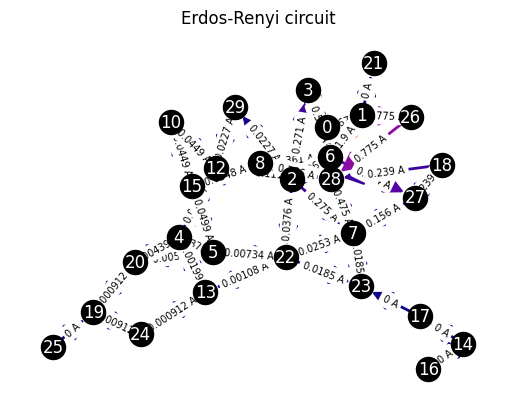

Cubic: OK
Time elapsed: 0.00s


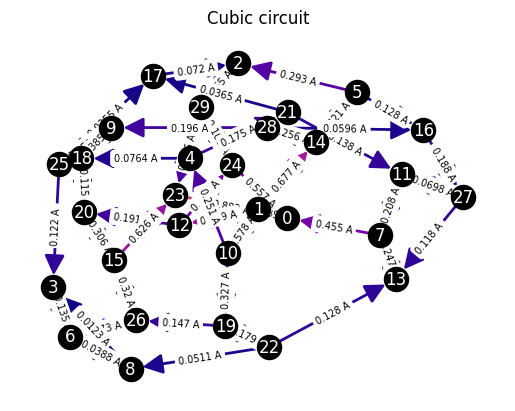

Grid: OK
Time elapsed: 0.00s


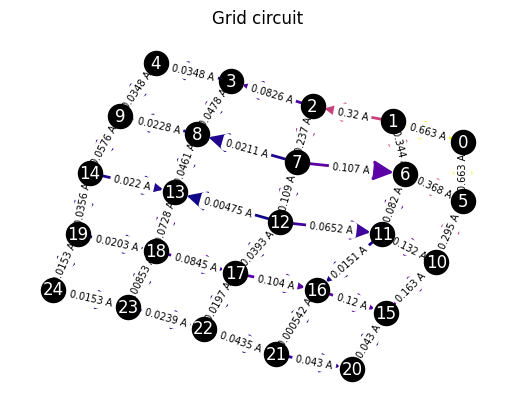

Small world: OK
Time elapsed: 0.01s


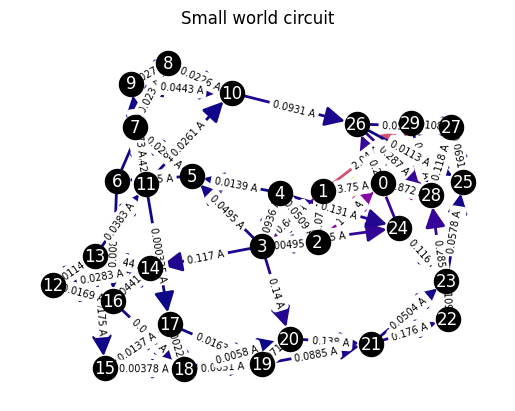

Bridge-connected: OK
Time elapsed: 0.00s


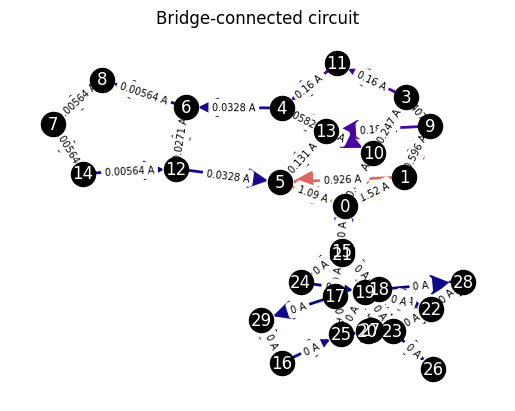

In [34]:
DEFAULT_SOURCE = 0
DEFAULT_TARGET = 1
DEFAULT_VOLTAGE = 10
DEFAULT_NODES = 50
DEFAULT_EPS = 1e-10

print("Enter parameters (press Enter to use default values):")
start_input = input(f"Start node (default = {DEFAULT_SOURCE}): ")
source = int(start_input) if start_input else DEFAULT_SOURCE
target_input = input(f"Target node (default = {DEFAULT_TARGET}): ")
target = int(target_input) if target_input else DEFAULT_TARGET
voltage_input = input(f"Voltage (default = {DEFAULT_VOLTAGE}): ")
voltage = int(voltage_input) if voltage_input else DEFAULT_VOLTAGE
nodes_input = input(f"Node amount (default = {DEFAULT_NODES}): ")
nodes = int(nodes_input) if nodes_input else DEFAULT_NODES
while nodes % 2 != 0:
    nodes_input = input("NODE AMOUNT MUST BE EVEN: ")
    nodes = int(nodes_input) if nodes_input else DEFAULT_NODES
eps_input = input(f"Epsilon (default = {DEFAULT_EPS}): ")
eps = float(eps_input) if eps_input else DEFAULT_EPS

generate_test_graphs(nodes)
directory = os.path.join(os.path.dirname(os.path.abspath('')), "test_graphs")
graphs = {
    "Erdos-Renyi":      load_circuit(os.path.join(directory, "erdos_renyi.txt")),
    "Cubic":            load_circuit(os.path.join(directory, "cubic_graph.txt")),
    "Grid":             load_circuit(os.path.join(directory, "grid_graph.txt")),
    "Small world":      load_circuit(os.path.join(directory, "small_world_graph.txt")), 
    "Bridge-connected": load_circuit(os.path.join(directory, "bridge_connected_graph.txt"))
    }

for graph_type, graph in graphs.items():
    start_time = time.time()
    kirchhoff_analysis(graph, source, target, voltage)
    end_time = time.time()
    print(f"{graph_type}: {"OK" if verify_circuit(graph, source, target, voltage, eps)\
                            else "FAILED"}")
    print(f"Time elapsed: {end_time-start_time:.2f}s")
    draw_circut(graph, graph_type, eps)